In [1]:
import pandas as pd
from scipy.special import binom
from tqdm import tqdm
from itertools import combinations
from pathlib import Path
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np


def rec_dd():
    return defaultdict(rec_dd)


In [2]:
benchmark_path = Path(
    "/home/gabrielathenes/Documents/study/HILARy/data_with_scripts/benchmark_on_synthetic_dataset"
)


In [3]:
def pairwise_evaluation(df, partition, ground_truth="simulations"):
    TP = 0
    P = binom(df.groupby([ground_truth]).size(), 2).sum()
    TP_FP = binom(df.groupby([partition]).size(), 2).sum()
    for _, family in tqdm(df.groupby([ground_truth]), disable=True):
        for r1, r2 in combinations(family[partition], 2):
            if r1 == r2:
                TP += 1
    if TP_FP == 0:
        return 0.0, 1.0
    elif P == 0:
        return None, None
    return (
        TP / P,
        TP / TP_FP,
    )  # sensitivity, precision

def entropy(dfGrouped):
    fs = dfGrouped.size()
    fs = fs / sum(fs)
    return sum(fs * np.log2(fs))


def variation_of_info(df, result):
    VI = (
        entropy(df.groupby(["simulations"]))
        + entropy(df.groupby([result]))
        - 2 * entropy(df.groupby([result, "simulations"]))
    )
    return VI


In [5]:
metric_dict=rec_dd()
for set in [1,2,3,4,5]:
    prec_list=[]
    sens_list=[]
    var_list=[]
    for l in range(15,48,3):
        dataframe=pd.DataFrame()
        for model in [f"hilary-full-1-2-0","hilary-CDR3-1-2-0"]:
            print(model)
            if model.startswith("hilary-full"):
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/inferred_full_method_families{set}_1e4_ppost326651_mut326713_cdr3l{l}.csv"
                    ),
                    index_col="sequence_id",
                )
                dataframe[model] = df["family"]

            else :
                df = pd.read_csv(
                    benchmark_path
                    / Path(
                        f"{model}/set{set}/inferred_cdr3_based_families{set}_1e4_ppost326651_mut326713_cdr3l{l}.csv"
                    ),
                    index_col="sequence_id",
                )
                dataframe[model] = df["cdr3_based_family"]
            dataframe["simulations"] = df["FAMILY"]
            sensitivity,precision=pairwise_evaluation(dataframe,model)
            varinfo = variation_of_info(dataframe,model)
            metric_dict[model]["precision"][l][set]=precision
            metric_dict[model]["sensitivity"][l][set]=sensitivity
            metric_dict[model]["variation_of_info"][l][set]=varinfo


hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR3-1-2-0
hilary-full-1-2-0
hilary-CDR

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


/tmp/ipykernel_1898562/2115544238.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plasma = cm.get_cmap("hot",8)


precision
sensitivity
variation_of_info
precision
sensitivity
variation_of_info


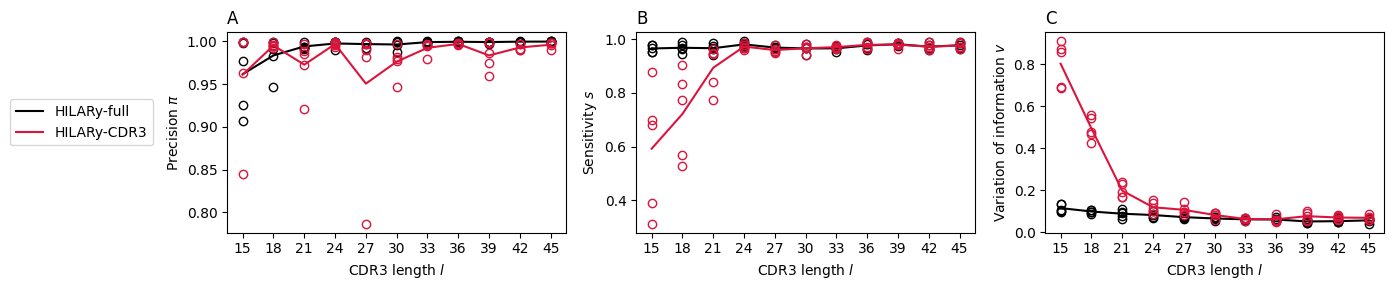

In [20]:
ls = np.arange(15, 45 + 3, 3)
fig = plt.figure(figsize=(14, 3))
ax1 = fig.add_subplot(131)
ax1.set_ylabel(r"Precision $\pi$")
ax1.set_xlabel("CDR3 length $l$")
ax2 = fig.add_subplot(132)
ax2.set_ylabel("Sensitivity $s$")
ax2.set_xlabel("CDR3 length $l$")
ax3 = fig.add_subplot(133)
ax3.set_ylabel(r"Variation of information $v$")
ax3.set_xlabel("CDR3 length $l$")


axes = [ax1, ax2, ax3]

colors = {
    "hilary-full-1-2-0": "k",
    "hilary-CDR3-1-2-0": "crimson"
}

for model in colors:
    if model == "hilary-full-1-2-0":
        label="HILARy-full"
    elif model == "hilary-CDR3-1-2-0":
        label = "HILARy-CDR3"
    else :
        label=model
    for i, metric in enumerate(metric_dict[model]):
        print(metric)
        for l in metric_dict[model][metric]:
            y = list(metric_dict[model][metric][l].values())
            x = [l] * len(y)
            axes[i].plot(
                x,
                y,
                "o",
                fillstyle="none",
                color=colors[model],
            )
        lengths = []
        averages = []
        for length in metric_dict[model][metric]:
            lengths.append(length)
            averages.append(np.mean(list(metric_dict[model][metric][length].values())))
        axes[i].plot(
            lengths,
            averages,
            color=colors[model],
            label=label,
        )
        axes[i].set_title(["A","B","C"][i],loc='left')


ax1.set_xticks(ls)
ax1.set_xticklabels(ls)
ax2.set_xticks(ls)
ax2.set_xticklabels(ls)
ax3.set_xticks(ls)
ax3.set_xticklabels(ls)

ax1.legend(bbox_to_anchor=(-2.5, -0.1, 2.3, 0.8))

plt.tight_layout()
# fig.savefig('new_figures/figure4.pdf',bbox_inches='tight',dpi=1000)
plt.savefig(
    "/home/gabrielathenes/Dropbox/Natanael_lineages_inference/revisions_2024_01_26/figures/figure4_synthetic.png",
)
plt.show()
